Filtering Operations
====================

In this tutorial you are going to learn how to use the different filtering operations found in `kornia.filters`.

In [2]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

import torch
import kornia
import torchvision

In [5]:
# We use OpenCV to load an image to memory represented in a numpy.array
img_bgr: np.array = cv2.imread('../data/drslump.jpg', cv2.IMREAD_COLOR)

In [6]:
# Convert the numpy array to torch
x_bgr: torch.Tensor = kornia.image_to_tensor(img_bgr)
x_rgb: torch.Tensor = kornia.bgr_to_rgb(x_bgr)

In [7]:
# Create batch and normalize
x_rgb = x_rgb.expand(2, -1, -1, -1)  # 4xCxHxW
x_rgb = x_rgb.float() / 255.

In [8]:
def imshow(input: torch.Tensor):
    out: torch.Tensor = torchvision.utils.make_grid(input, nrow=2, padding=1)
    out_np: np.array = kornia.tensor_to_image(out)
    plt.imshow(out_np)
    plt.axis('off')

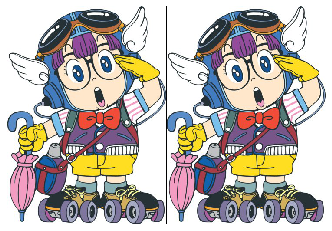

In [9]:
# Show original
imshow(x_rgb)

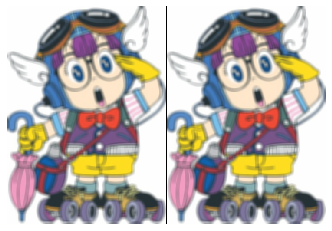

In [10]:
# Box Blur
x_blur: torch.Tensor = kornia.box_blur(x_rgb, (9, 9))
imshow(x_blur)

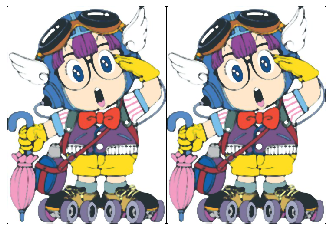

In [11]:
# Media Blur
x_blur: torch.Tensor = kornia.median_blur(x_rgb, (5, 5))
imshow(x_blur)

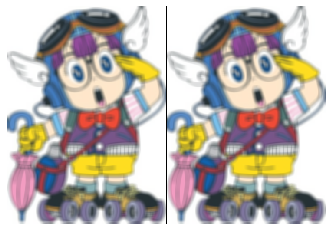

In [12]:
# Gaussian Blur
x_blur: torch.Tensor = kornia.gaussian_blur2d(x_rgb, (11, 11), (11., 11.))
imshow(x_blur)